# Comparison between full wavefield and diffusive approximation for a fullspace

Play around to see that the difference is getting bigger for
- higher frequencies,
- higher eperm/mperm.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from empymod import dipole
from empymod.kernel import halfspace

# Style adjustments
%matplotlib inline
plt.style.use('ggplot')
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.serif'] = 'Computer Modern Roman'
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.style'] = 'normal'

### Define model

In [2]:
x = (np.arange(1051))*10-500
rx = np.repeat([x,],np.size(x),axis=0)
ry = rx.transpose()
zsrc= 150
zrec = 200
res = 1/3
freq = 0.5
ab = 11
aniso = np.sqrt(3/.3)
epermH = 1
epermV = 1
mpermH = 1
mpermV = 1

### Calculation

In [3]:
# Halfspace
hs = halfspace(rx.ravel(), ry.ravel(), zsrc, zrec, res, freq, aniso, ab, output='fs')
hs = hs.reshape(np.shape(rx))

# Fullspace
fs = dipole([0, 0, zsrc], [rx.ravel(), ry.ravel(), zrec], [], res, freqtime=freq, aniso=aniso, ab=ab, xdirect=True,
            epermH=epermH, epermV=epermV, mpermH=mpermH, mpermV=mpermV, verb=0)
fs = fs.reshape(np.shape(rx))

# Relative error (%)
amperr = np.abs((np.abs(fs) - np.abs(hs))/np.abs(fs))*100
phaerr = np.abs((np.angle(fs) - np.angle(hs))/np.angle(fs))*100

### Plot

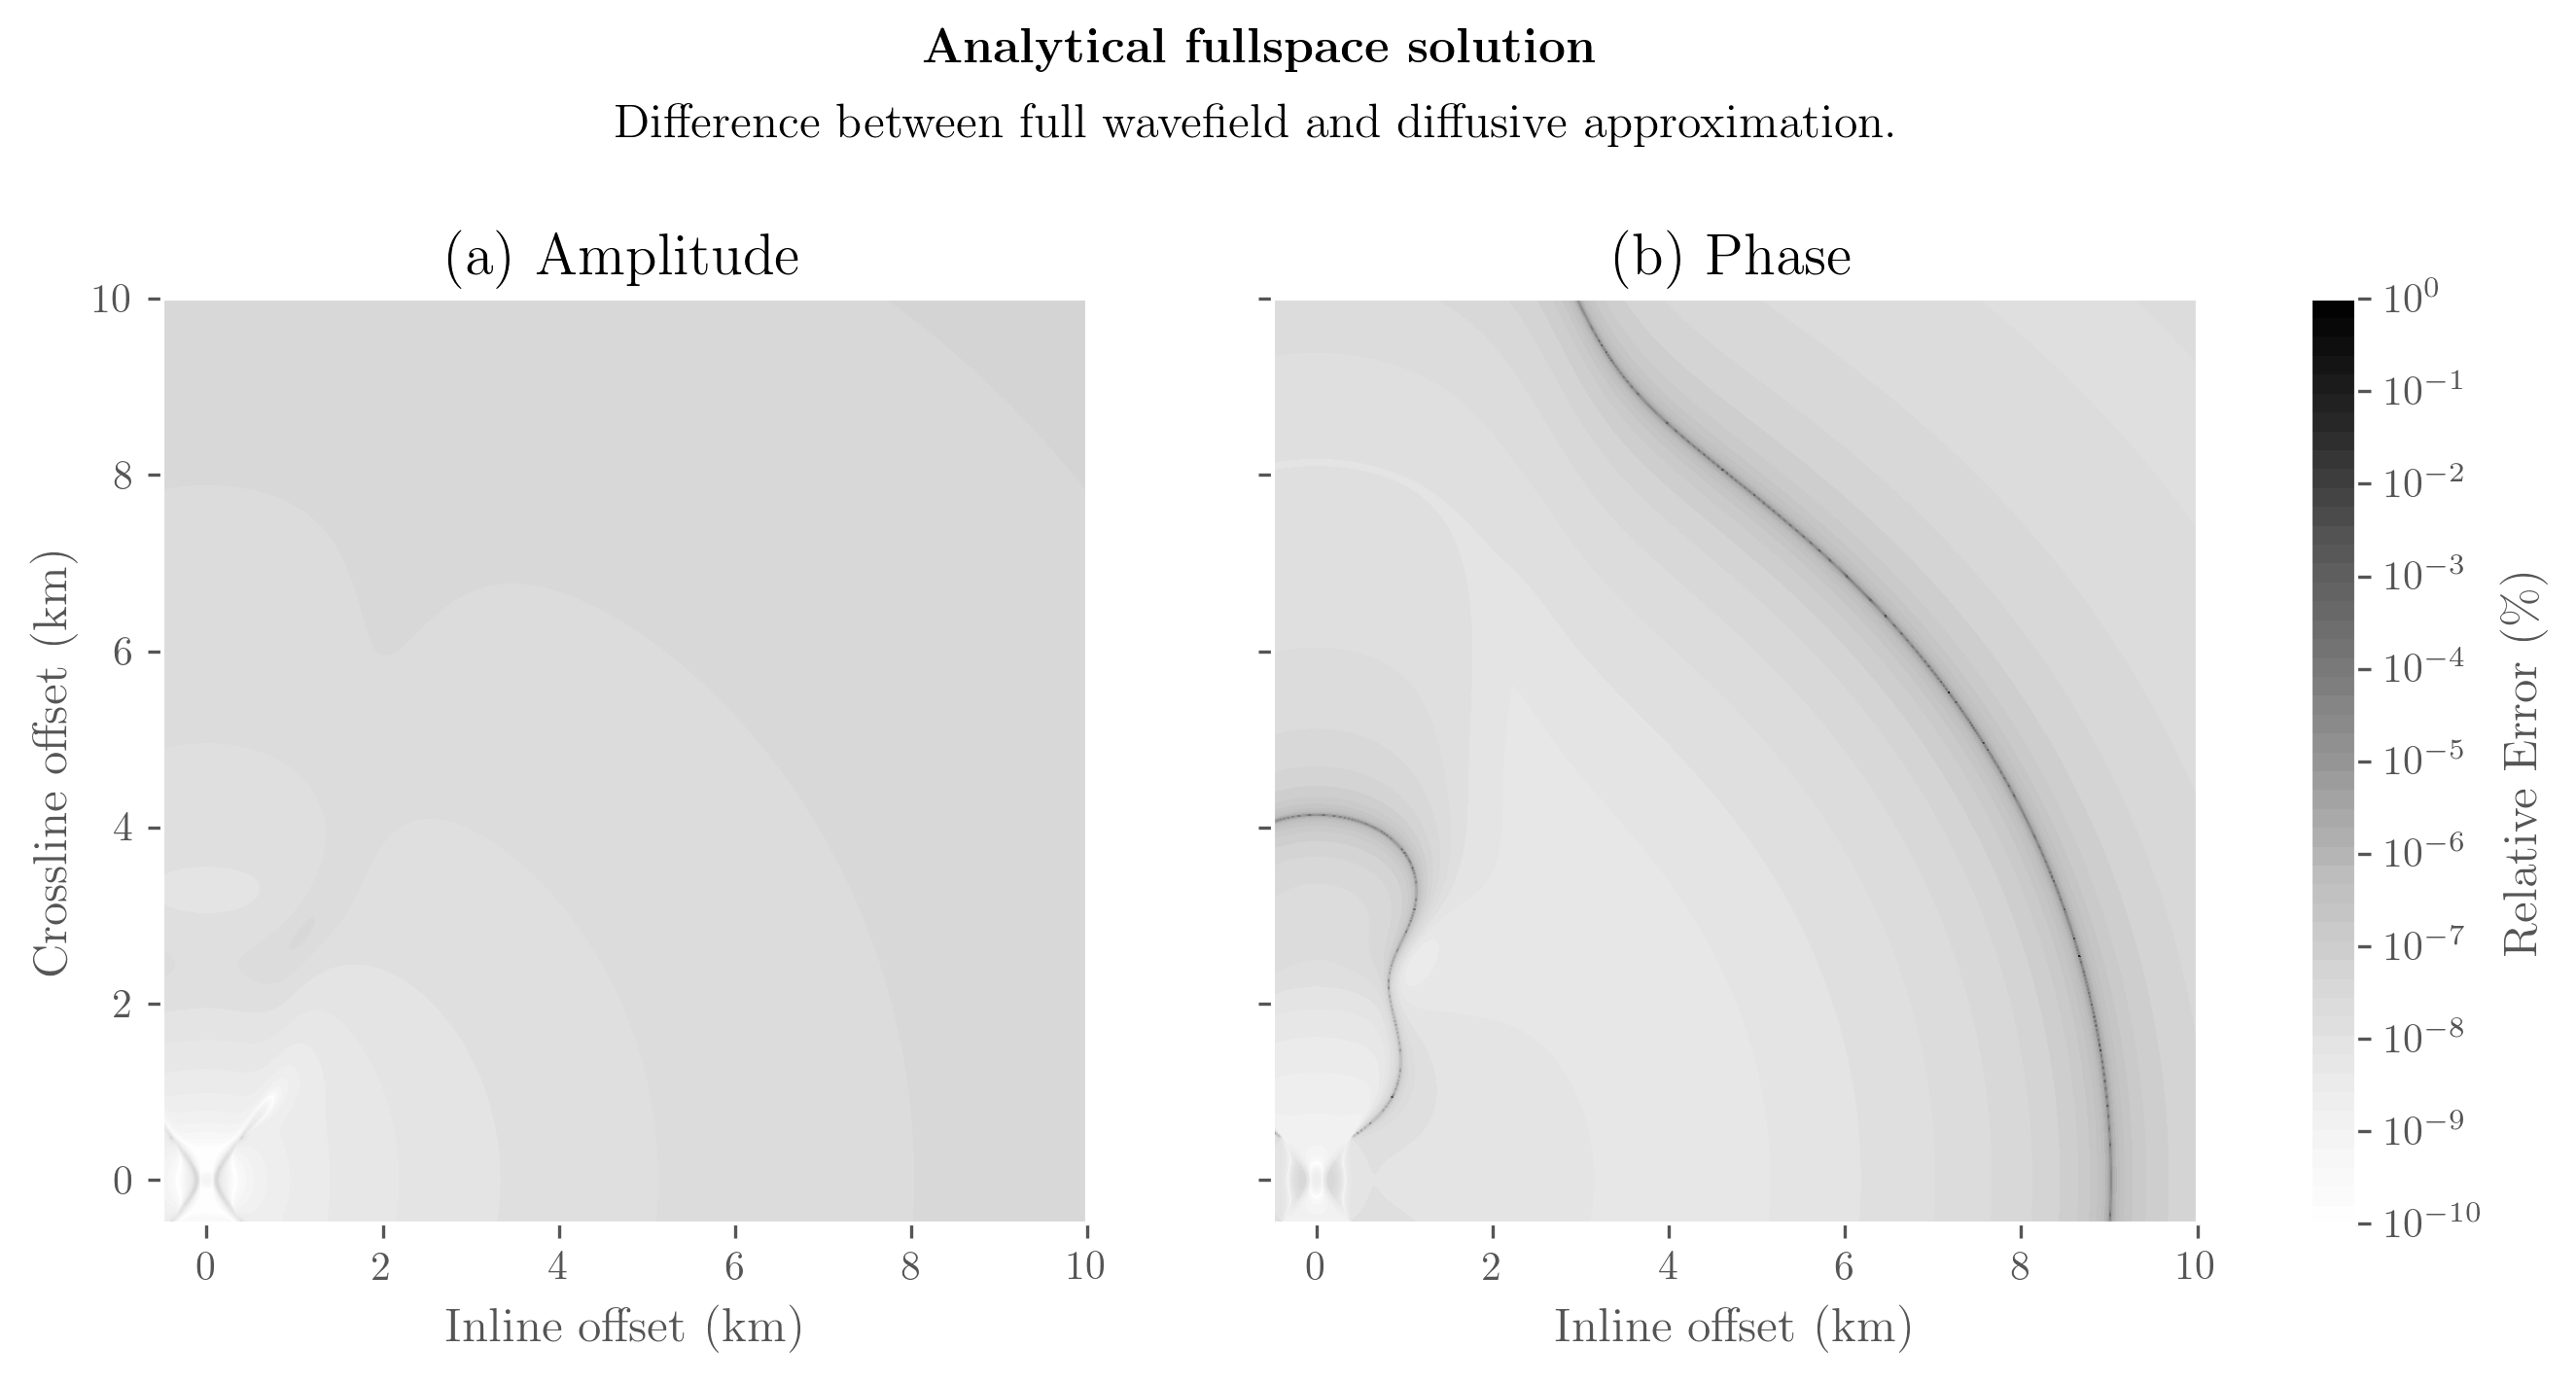

In [4]:
fig, axs = plt.subplots(figsize=(10, 4.2), nrows=1, ncols=2, sharex=True, sharey=True)

# Min and max, properties
vmin = 1e-10
vmax = 1e0
props = {'levels': np.logspace(np.log10(vmin), np.log10(vmax), 50), 'locator': mpl.ticker.LogLocator(), 'cmap': 'Greys'}

# Plot amplitude error
plt.sca(axs[0])
plt.title(r'(a) Amplitude')
cf1 = plt.contourf(rx/1000, ry/1000, amperr.clip(vmin, vmax), **props)
plt.ylabel('Crossline offset (km)')
plt.xlabel('Inline offset (km)')
plt.xlim(min(x)/1000, max(x)/1000)
plt.ylim(min(x)/1000, max(x)/1000)
plt.axis('equal')    

# Plot phase error
plt.sca(axs[1])
plt.title(r'(b) Phase')
cf2 = plt.contourf(rx/1000, ry/1000, phaerr.clip(vmin, vmax), **props)
plt.xlabel('Inline offset (km)')
plt.xlim(min(x)/1000, max(x)/1000)
plt.ylim(min(x)/1000, max(x)/1000)
plt.axis('equal') 

# Title
plt.suptitle(r'{\bf \hspace{2cm} Analytical fullspace solution\\[.5em]}Difference between full wavefield and diffusive approximation.',
             y=1.1)

# Plot colorbar
cax, kw = mpl.colorbar.make_axes([axs[0], axs[1]], location='right', fraction=.05, pad=0.05, aspect=20)
cb = plt.colorbar(cf2, cax=cax, ticks=10**(-(np.arange(13.)[::-1])+2), **kw)
cb.set_label(r'Relative Error $(\%)$')

# Show
plt.show()

In [5]:
import printinfo
printinfo.info()